# Xem xét việc một hành khách có sống sót hay không dựa trên bộ dữ liệu titanic (train.csv có 891 mẫu và test.csv có 418 mẫu )

# Yêu cầu: 
## Hãy đọc dữ liệu từ các tập tin này, áp dụng Logistic Regression 
## để thực hiện việc xác định một hành khách có sống sót hay không dựa trên những thông tin được cung cấp.

## Đọc dữ liệu train.csv, tiền xử lý dữ liệu nếu cần
## Tạo X_train, X_test, y_train, y_test từ dữ liệu ở câu 1 với tỷ lệ dữ liệu test là 0.2
## Áp dụng thuật toán Logistic Regression: fit model, tìm độ chính xác, đánh giá mô hình bằng kiểm tra underfiting và overfiting?
## Đọc dữ liệu test.csv. Tiền xử lý dữ liệu như train.csv. Tìm kết quả cho dữ liệu test.
## Ghi kết quả vào file test_pred.csv
## Áp dụng Pipeline. Lưu kết quả khi áp dụng Pipeline vào file test_pred.csv (thêm 1 cột kết quả mới)

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats

In [106]:
titanic_train = pd.read_csv('data9/Ex2_Titanic/train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
x = titanic_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Survived', 'Name'], axis=1)
x['Age'] = x['Age'].fillna(x['Age'].median())
x.dropna(inplace=True)

y = titanic_train['Survived'].drop(titanic_train.loc[titanic_train['Embarked'].isna()].index)

In [110]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


## Tạo X_train, X_test, y_train, y_test từ dữ liệu ở câu 1 với tỷ lệ dữ liệu test là 0.2
## Áp dụng thuật toán Logistic Regression: fit model, tìm độ chính xác, đánh giá mô hình bằng kiểm tra underfiting và overfiting?

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

Accuracy score of LogReg model on test set: 0.8258426966292135

Confusion matrix of LogReg model:
 [[90 15]
 [16 57]]

Classification report of LogReg model:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        73

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178


ROC_AUC score of LogReg model: 0.9039791258969342



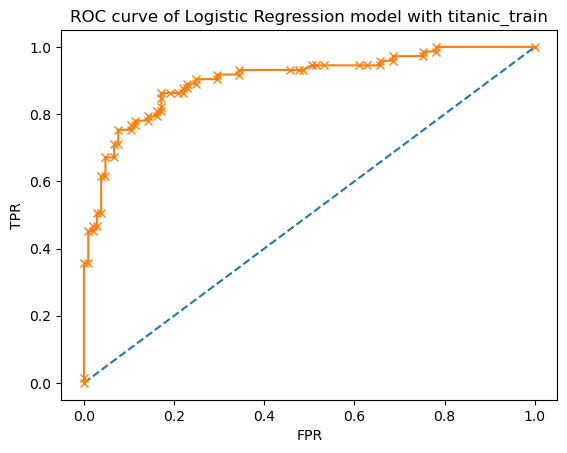

In [124]:
x_train, x_test, y_train, y_test = train_test_split(pd.get_dummies(x, drop_first=True).astype('float64'), y, test_size=0.2, random_state=1)

logreg = LogisticRegression(max_iter=500, solver='liblinear').fit(x_train, y_train)

y_pred_test = logreg.predict(x_test)
y_proba_test = logreg.predict_proba(x_test)

print(f'Accuracy score of LogReg model on test set: {accuracy_score(y_test, y_pred_test)}')
print()
print(f'Confusion matrix of LogReg model:\n {confusion_matrix(y_test, y_pred_test)}')
print()
print(f'Classification report of LogReg model:\n {classification_report(y_test, y_pred_test)}')
print()
print(f'ROC_AUC score of LogReg model: {roc_auc_score(y_test, y_proba_test[:,1])}')
print()

fpr, tpr, threshold = roc_curve(y_test, y_proba_test[:,1])
plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr, tpr, marker='x', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve of Logistic Regression model with titanic_train')
plt.show()

### All scores are high

## <span style='color:yellow'> Predict new data from file test.csv

In [113]:
titanic_test = pd.read_csv('data9/Ex2_Titanic/test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [114]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [115]:
x_titanic_test = titanic_test.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1)
x_titanic_test['Age'] = x_titanic_test['Age'].fillna(x['Age'].median())
x_titanic_test['Fare'] = x_titanic_test['Fare'].fillna(x['Fare'].median())

y_titanic_test = pd.read_csv('data9/Ex2_Titanic/gender_submission.csv')
y_titanic_test.drop('PassengerId', axis=1, inplace=True)

In [116]:
predict_new = pd.DataFrame({
    'y_true': y_titanic_test.to_numpy().ravel(),
    'y_pred': logreg.predict(pd.get_dummies(x_titanic_test, drop_first=True).astype('float64'))
})

predict_new

,y_true,y_pred
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


Accuracy score of LogReg model on file test.csv: 0.9521531100478469

Confusion matrix of LogReg model on file test.csv:
 [[255  11]
 [  9 143]]

Classification report of LogReg model on file test.csv:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       266
           1       0.93      0.94      0.93       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418


ROC_AUC score of LogReg model on file test.csv: 0.9832558369608232



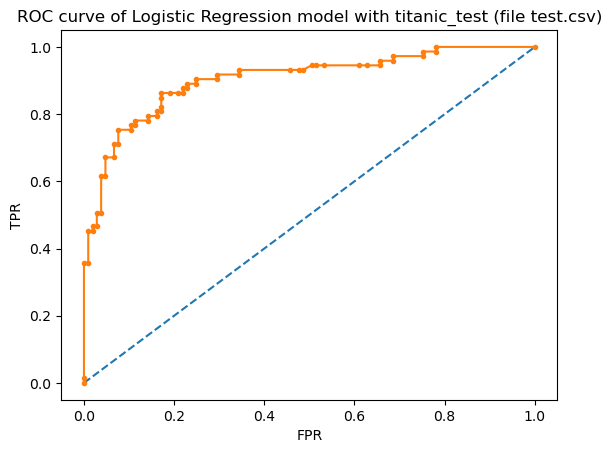

In [125]:
print(f'Accuracy score of LogReg model on file test.csv: {accuracy_score(predict_new['y_true'], predict_new['y_pred'])}')
print()
print(f'Confusion matrix of LogReg model on file test.csv:\n {confusion_matrix(predict_new['y_true'], predict_new['y_pred'])}')
print()
print(f'Classification report of LogReg model on file test.csv:\n {classification_report(predict_new['y_true'], predict_new['y_pred'])}')
print()
y_proba_titanic_test = logreg.predict_proba(pd.get_dummies(x_titanic_test, drop_first=True))
print(f'ROC_AUC score of LogReg model on file test.csv: {roc_auc_score(predict_new['y_true'], y_proba_titanic_test[:,1])}')
print()

fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_proba_test[:,1])
plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr_test, tpr_test, marker='.', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve of Logistic Regression model with titanic_test (file test.csv)')
plt.show()

## <span style='color:yellow'> Build pipeline

In [126]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [127]:
x_pipe = titanic_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Survived', 'Name'], axis=1)
x_pipe['Age'] = x_pipe['Age'].fillna(x['Age'].median())
x_pipe.dropna(inplace=True)

y_pipe = titanic_train['Survived'].drop(titanic_train.loc[titanic_train['Embarked'].isna()].index)

In [128]:
pipe_logreg = Pipeline([
    ("Onehot Encoder", make_column_transformer((OneHotEncoder(), ['Sex', 'Embarked']), force_int_remainder_cols=False)),
    ("LogReg model", LogisticRegression(max_iter=500, solver='liblinear'))
])

pipe_logreg.fit(x_pipe, y_pipe)

Pipeline(steps=[('Onehot Encoder',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('LogReg model',
                 LogisticRegression(max_iter=500, solver='liblinear'))])

In [129]:
predict_new['y_pred_pipe'] = pipe_logreg.predict(x_titanic_test)

Accuracy score of LogReg pipeline on file test.csv: 1.0

Confusion matrix of LogReg pipeline on file test.csv:
 [[266   0]
 [  0 152]]

Classification report of LogReg pipeline on file test.csv:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418


ROC_AUC score of LogReg pipeline on file test.csv: 0.9999999999999999



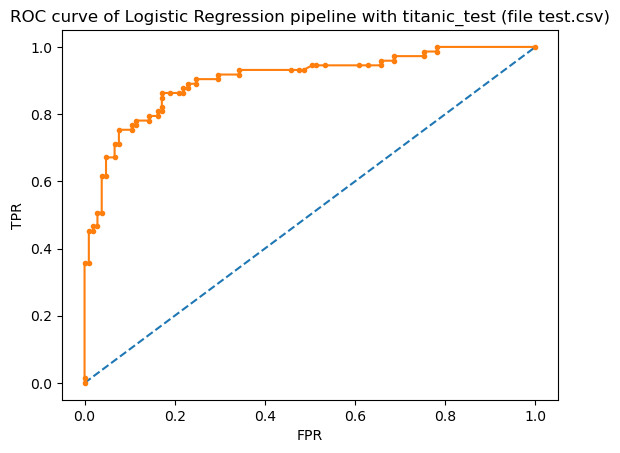

In [132]:
print(f'Accuracy score of LogReg pipeline on file test.csv: {accuracy_score(predict_new['y_true'], predict_new['y_pred_pipe'])}')
print()
print(f'Confusion matrix of LogReg pipeline on file test.csv:\n {confusion_matrix(predict_new['y_true'], predict_new['y_pred_pipe'])}')
print()
print(f'Classification report of LogReg pipeline on file test.csv:\n {classification_report(predict_new['y_true'], predict_new['y_pred_pipe'])}')
print()
y_proba_titanic_test_pipe = pipe_logreg.predict_proba(x_titanic_test)
print(f'ROC_AUC score of LogReg pipeline on file test.csv: {roc_auc_score(predict_new['y_true'], y_proba_titanic_test_pipe[:,1])}')
print()

fpr_pipe, tpr_pipe, threshold_test = roc_curve(predict_new['y_true'], y_proba_titanic_test_pipe[:,1])
plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr_test, tpr_test, marker='.', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve of Logistic Regression pipeline with titanic_test (file test.csv)')
plt.show()

## <span style='color:yellow'> Save predict_new into test_pred.csv

In [134]:
predict_new.to_csv('data9/Ex2_Titanic/test_pred.csv')

In [ ]:
from imblearn.over_sampling